<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Gather-Data" data-toc-modified-id="Gather-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gather Data</a></span></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Choosing-Top-5-Zipcodes" data-toc-modified-id="Choosing-Top-5-Zipcodes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choosing Top 5 Zipcodes</a></span></li><li><span><a href="#Data-Preperation-and-Analysis" data-toc-modified-id="Data-Preperation-and-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Preperation and Analysis</a></span><ul class="toc-item"><li><span><a href="#Checking-Seasonality" data-toc-modified-id="Checking-Seasonality-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Checking Seasonality</a></span></li><li><span><a href="#Checking-Monthly-Returns" data-toc-modified-id="Checking-Monthly-Returns-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Checking Monthly Returns</a></span></li><li><span><a href="#Checking-for-Stationarity" data-toc-modified-id="Checking-for-Stationarity-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Checking for Stationarity</a></span></li><li><span><a href="#Modeling-Each-Zipcode" data-toc-modified-id="Modeling-Each-Zipcode-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Modeling Each Zipcode</a></span><ul class="toc-item"><li><span><a href="#Charleston-29407" data-toc-modified-id="Charleston-29407-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Charleston 29407</a></span></li><li><span><a href="#Charleston-29412" data-toc-modified-id="Charleston-29412-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Charleston 29412</a></span></li><li><span><a href="#Alexandria-56308-FB" data-toc-modified-id="Alexandria-56308-FB-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Alexandria 56308 FB</a></span></li><li><span><a href="#Minneapolis-55406" data-toc-modified-id="Minneapolis-55406-5.4.4"><span class="toc-item-num">5.4.4&nbsp;&nbsp;</span>Minneapolis 55406</a></span></li><li><span><a href="#Sherrelwood-80221" data-toc-modified-id="Sherrelwood-80221-5.4.5"><span class="toc-item-num">5.4.5&nbsp;&nbsp;</span>Sherrelwood 80221</a></span></li></ul></li><li><span><a href="#Facebook-Profit-Model" data-toc-modified-id="Facebook-Profit-Model-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Facebook Profit Model</a></span></li><li><span><a href="#Charleston-29407-FB" data-toc-modified-id="Charleston-29407-FB-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Charleston 29407 FB</a></span></li><li><span><a href="#Charleston-29412-FB" data-toc-modified-id="Charleston-29412-FB-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Charleston 29412 FB</a></span></li><li><span><a href="#Alexandria-56308-FB" data-toc-modified-id="Alexandria-56308-FB-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Alexandria 56308 FB</a></span></li><li><span><a href="#Minneapolis-55406-FB" data-toc-modified-id="Minneapolis-55406-FB-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Minneapolis 55406 FB</a></span></li><li><span><a href="#Sherrelwood-80221-FB" data-toc-modified-id="Sherrelwood-80221-FB-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>Sherrelwood 80221 FB</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as MSE

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Gather Data

In [2]:
# Loading Data. Data Has been obtained from https://www.zillow.com/research/data/
zillow_data = pd.read_csv('zillow_data.csv')
#Removing RegionID because RegionName is proper ZipCode
zillow_data.drop(columns = 'RegionID', inplace=True)
zillow_data.head()

RegionName      City State              Metro CountyName  SizeRank  \
0       60657   Chicago    IL            Chicago       Cook         1   
1       75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2       77494      Katy    TX            Houston     Harris         3   
3       60614   Chicago    IL            Chicago       Cook         4   
4       79936   El Paso    TX            El Paso    El Paso         5   

    1996-04   1996-05   1996-06   1996-07  ...  2017-07  2017-08  2017-09  \
0  334200.0  335400.0  336500.0  337600.0  ...  1005500  1007500  1007800   
1  235700.0  236900.0  236700.0  235400.0  ...   308000   310000   312500   
2  210400.0  212200.0  212200.0  210700.0  ...   321000   320600   320200   
3  498100.0  500900.0  503100.0  504600.0  ...  1289800  1287700  1287400   
4   77300.0   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 271 columns]

# Helper Functions

In [3]:
# Function created to change the format of columns from year-month to year-month-day
def get_datetimes(df):
    return pd.to_datetime(df.columns[7:].values[1:], format='%Y-%m')

In [4]:
#Change Wide formated data above into Long format
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [5]:
def train_test_split(df):
    #Set training data before 2016
    train = df[:'2015-04']
    #Set test data starting 2016
    test = df['2015-05':]
    return train, test

In [6]:
def seasonal_plots(df,N=13,lags=[12,24,36,48,60,72]):
    #Differencing the rolling mean to find seasonality in the resulting acf plot.
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,8))
    rolling = df - df.rolling(N).mean()
    plot_acf(rolling.dropna(),lags=lags,ax=ax1)
    plot_pacf(rolling.dropna(),lags=lags,ax=ax2)
    plt.show();

In [7]:
def model_fit(df, pdq, pdqs):
    train, test = train_test_split(df)
    model = SARIMAX(train,order=pdq,seasonal_order=pdqs)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results


In [8]:
def test_RMSE(df,pdq,pdqs, display=True):
    X = df.values
    train, test = X[:-36],X[-36:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=pdq,seasonal_order=pdqs)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = np.sqrt(MSE(test, predictions))
    print('SARIMA model RMSE on test data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        plt.title('Actual Test Data vs. Predictions')
        plt.plot(history[-36:],label='Actual', color='b')
        plt.plot(predictions,label='Predictions',color='r')
        plt.legend(loc='best')
        plt.show()


In [9]:
def train_RMSE(df, results, display = True):
    train_pred = results.predict(-36)
    rmse = np.sqrt(MSE(train[-36:],train_pred))
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        train[-60:].plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Returns')
        plt.show()

In [10]:
def forecast_model(df, pdq, pdqs, display=True,zc='input zipcode'):
    model = SARIMAX(df, order=pdq,seasonal_order=pdqs)
    model_fit = model.fit()
    output = model_fit.get_prediction(start='2018-04',end='2030-04', dynamic=True)
    forecast_ci = output.conf_int()
    if display:
        fig, ax = plt.subplots(figsize=(13,6))
        output.predicted_mean.plot(label='Forecast')
        ax.fill_between(forecast_ci.index,forecast_ci.iloc[:, 0],forecast_ci.iloc[:, 1],
                        color='k', alpha=.25,label='Conf Interval')
        plt.title('Forecast of Monthly Returns')
        plt.xlabel('Time')
        plt.legend(loc='best')
        plt.show()
    year_1= (1+output.predicted_mean[:12]).prod()-1
    year_5= (1+output.predicted_mean[:60]).prod()-1
    year_10=(1+output.predicted_mean).prod()-1
    print(f'Total expected return in 1 year: {round(year_1*100,2)}%')
    print(f'Total expected return in 5 year: {round(year_5*100,2)}%')
    print(f'Total expected return in 10 years: {round(year_10*100,2)}%')
    Returns = [zc, year_1, year_5, year_10]
    return Returns

# Choosing Top 5 Zipcodes

In [11]:
# So For this project we will be dealing with the the top 30% is size rank. After reasearch, Size rank is the level of urbanization that the city has.
size_rank_ = zillow_data.SizeRank.quantile(q=.3)
zillow_size_rank_ = zillow_data[zillow_data['SizeRank'] < size_rank_]
zillow_size_rank_.head()

RegionName      City State              Metro CountyName  SizeRank  \
0       60657   Chicago    IL            Chicago       Cook         1   
1       75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2       77494      Katy    TX            Houston     Harris         3   
3       60614   Chicago    IL            Chicago       Cook         4   
4       79936   El Paso    TX            El Paso    El Paso         5   

    1996-04   1996-05   1996-06   1996-07  ...  2017-07  2017-08  2017-09  \
0  334200.0  335400.0  336500.0  337600.0  ...  1005500  1007500  1007800   
1  235700.0  236900.0  236700.0  235400.0  ...   308000   310000   312500   
2  210400.0  212200.0  212200.0  210700.0  ...   321000   320600   320200   
3  498100.0  500900.0  503100.0  504600.0  ...  1289800  1287700  1287400   
4   77300.0   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 271 columns]

In [12]:
#Done to try to find out Which states have the most zipcodes on the top 25% Size Rank
#len(zillow_size_rank_25.loc[zillow_size_rank_25['State'] == 'TX']) # 347
#len(zillow_size_rank_25.loc[zillow_size_rank_25['State'] == 'CA']) # 572
#len(zillow_size_rank_25.loc[zillow_size_rank_25['State'] == 'FL']) # 311

In [13]:
#Get the Average Housing Price from our dataset.
zillow_size_rank_['YearAvg'] = zillow_size_rank_.iloc[:-12].mean(skipna=True, axis=1)

# Establish a cutt off value for our dataset based on mean price(upper Value)
cutt_off_1 = zillow_size_rank_.YearAvg.quantile(q = .7)

# Establish a cutt of value for our dataset based on mean price(lower value)
cutt_off_2 = zillow_size_rank_.YearAvg.quantile(q=.3)

#Prefered zipcode, a dataframe created off of the preference created above
zillow_preference = zillow_size_rank_[(zillow_size_rank_.YearAvg < cutt_off_1) & 
                                      (zillow_size_rank_.YearAvg>cutt_off_2)]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#Calculate historical return on investment[roi]
zillow_preference['roi'] = (zillow_preference['2018-04']/zillow_preference['1996-04'])-1

#Standard Deviation of Monthly values[std]
zillow_preference['std'] = zillow_preference.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)

#Historical mean Value[mean]
zillow_preference['mean'] = zillow_preference.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

#Coefficient of variance[cv]
zillow_preference['CV'] = zillow_preference['std']/zillow_preference['mean']

#Return dataframe
zillow_preference[['RegionName','std','mean','roi','CV']].head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

RegionName           std           mean       roi        CV
1        75070  33537.101427  219655.849057  0.365295  0.152680
11       32162  53805.394161  183692.830189  1.493069  0.292910
14       37013  19771.938500  139191.698113  0.885231  0.142048
17       37211  36496.608464  147387.924528  1.698672  0.247623
18       78660  24894.592870  168193.584906  0.748020  0.148012

In [15]:
zillow_preference.CV.describe()

count    1761.000000
mean        0.234815
std         0.081761
min         0.028179
25%         0.170412
50%         0.229540
75%         0.289128
max         0.482668
Name: CV, dtype: float64

In [16]:
#Define upper limit of risk
upper_cv = zillow_preference.CV.quantile(.75)
df = zillow_preference[zillow_preference['CV']<upper_cv].sort_values('roi',axis=0,ascending=False)[:5]

In [17]:
df[['City', 'RegionName','roi','CV']]

City  RegionName       roi        CV
1236   Charleston       29407  2.898833  0.286769
1052   Charleston       29412  2.892435  0.288194
2974   Alexandria       56308  2.670051  0.251144
1540  Minneapolis       55406  2.475342  0.276417
2165  Sherrelwood       80221  2.380192  0.282805

In [18]:
df.drop(['City', 'State', 'Metro', 'CountyName', 'SizeRank','YearAvg', 'roi',
       'std', 'mean', 'CV'], axis=1, inplace=True)

In [19]:
df

RegionName  1996-04  1996-05  1996-06  1996-07  1996-08  1996-09  \
1236       29407  77100.0  77400.0  77900.0  78400.0  79000.0  79700.0   
1052       29412  84600.0  85100.0  85900.0  86800.0  87800.0  89000.0   
2974       56308  59100.0  59300.0  59400.0  59500.0  59500.0  59400.0   
1540       55406  73000.0  73300.0  73400.0  73600.0  73900.0  74100.0   
2165       80221  93900.0  94400.0  95000.0  95600.0  96200.0  96800.0   

      1996-10  1996-11  1996-12  ...  2017-07  2017-08  2017-09  2017-10  \
1236  80600.0  81600.0  82700.0  ...   276200   278600   282200   285300   
1052  90300.0  91700.0  93300.0  ...   308400   310200   313400   316500   
2974  59200.0  59100.0  59100.0  ...   200300   201300   203300   205500   
1540  74400.0  74600.0  75000.0  ...   236100   238000   239500   241300   
2165  97500.0  98200.0  99000.0  ...   292200   295400   298200   299800   

      2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
1236   288700   292000   294500   296200   298800   300600  
1052   318300   320000   321900   324100   327100   329300  
2974   207100   208400   210500   212900   215200   216900  
1540   243400   245700   247900   249500   251800   253700  
2165   301700   304700   307400   310400   314600   317400  

[5 rows x 266 columns]

# Data Preperation and Analysis

In [20]:
#Melting Data into desired format
zc5 = melt_data(df).set_index('time')
print('Time series data for the 5 zipcodes:\n', zc5.head())

Time series data for the 5 zipcodes:
             RegionName    value
time                           
1996-04-01       29407  77100.0
1996-04-01       29412  84600.0
1996-04-01       56308  59100.0
1996-04-01       55406  73000.0
1996-04-01       80221  93900.0


In [21]:
#List containing the 5 different time series.
dfs_ts = []
for zc in zc5.RegionName:
    #Create separate dataframes for each zipcode with a monthly frequency.
    df = zc5[zc5['RegionName']==zc]
    dfs_ts.append(df)
print('\nZipcode 29407 time series:')
dfs_ts[0]


Zipcode 29407 time series:


RegionName     value
time                            
1996-04-01       29407   77100.0
1996-05-01       29407   77400.0
1996-06-01       29407   77900.0
1996-07-01       29407   78400.0
1996-08-01       29407   79000.0
...                ...       ...
2017-12-01       29407  292000.0
2018-01-01       29407  294500.0
2018-02-01       29407  296200.0
2018-03-01       29407  298800.0
2018-04-01       29407  300600.0

[265 rows x 2 columns]

In [22]:
#Checking for trends with descriptive Statistics
for i in range(5):
    print(f'Value descriptive statistics for zipcode {dfs_ts[i].RegionName[i]}:')
    print(f'{dfs_ts[i].value.describe()}\n')

Value descriptive statistics for zipcode 29407:
count       265.000000
mean     176552.452830
std       50629.836129
min       77100.000000
25%      140800.000000
50%      183300.000000
75%      205300.000000
max      300600.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 29412:
count       265.000000
mean     203152.452830
std       58547.356541
min       84600.000000
25%      157700.000000
50%      211300.000000
75%      244700.000000
max      329300.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 56308:
count       265.000000
mean     150315.094340
std       37750.795678
min       59100.000000
25%      141600.000000
50%      163600.000000
75%      171000.000000
max      216900.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 55406:
count       265.000000
mean     167713.207547
std       46358.858122
min       73000.000000
25%      146500.000000
50%      181400.000000
75%      201000.000000
max     

## Checking Seasonality

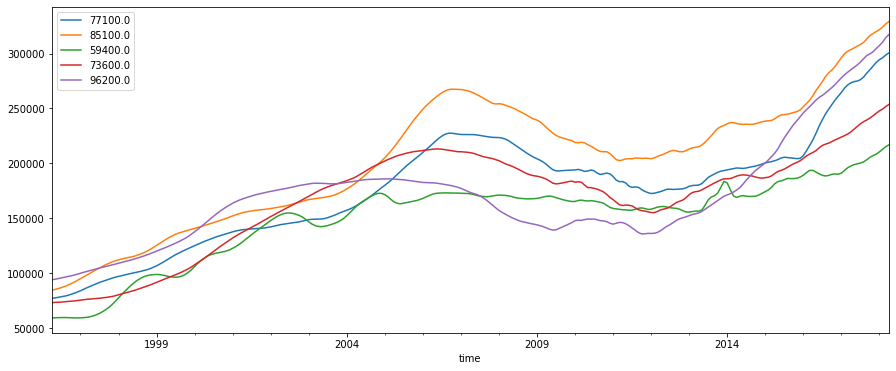

In [23]:
#Checking for seasonality in Data
for i in range(5):
    dfs_ts[i].value.plot(label=dfs_ts[i].value[i],figsize=(15,6))
    plt.legend() 

## Checking Monthly Returns

In [24]:
#Calculate monthly returns in new column for top 5 zipcodes
for zc in range(5):
    dfs_ts[zc]['Return']=np.nan*len(dfs_ts[zc])
    for i in range(len(dfs_ts[zc])-1):
        dfs_ts[zc]['Return'][i+1]= (dfs_ts[zc].value.iloc[i+1] / dfs_ts[zc].value.iloc[i]) - 1


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

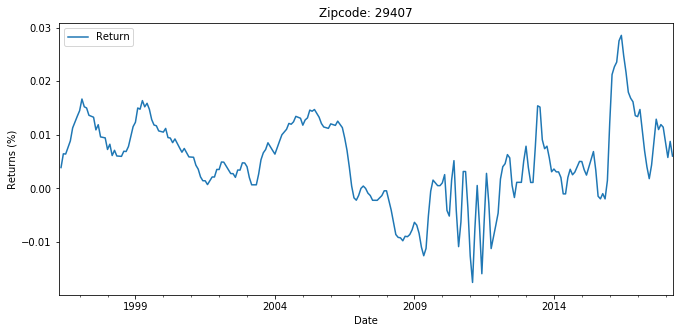

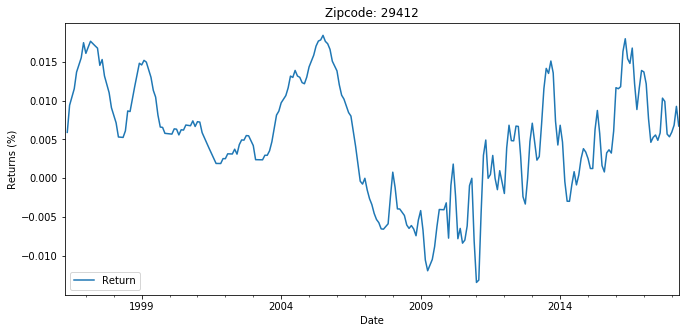

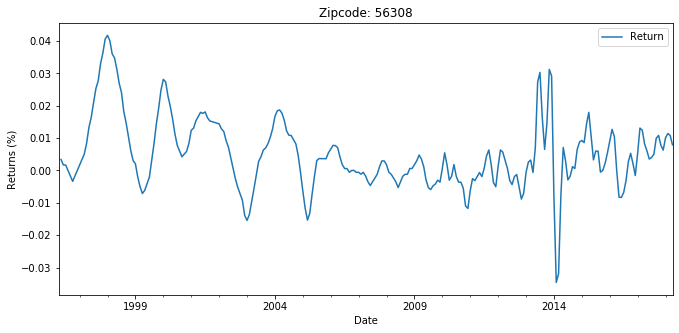

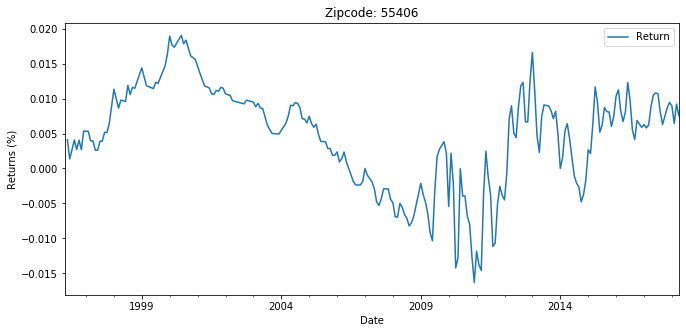

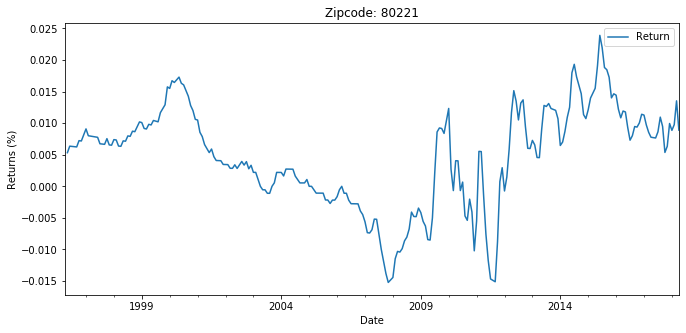

In [25]:
# Monthly Return for Zipcodes
for i in range(5):
    dfs_ts[i].Return.plot(figsize=(11,5))
    plt.title(f'Zipcode: {dfs_ts[i].RegionName[i]}')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend()
    plt.show()


## Checking for Stationarity

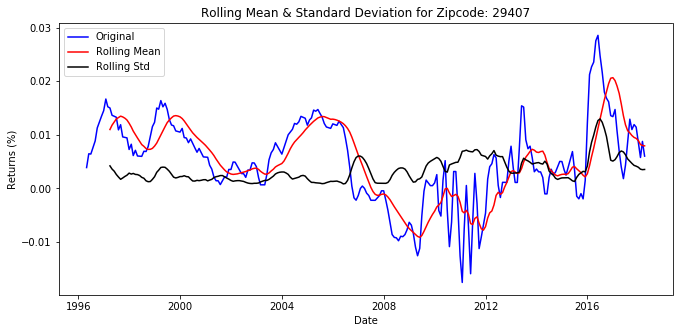

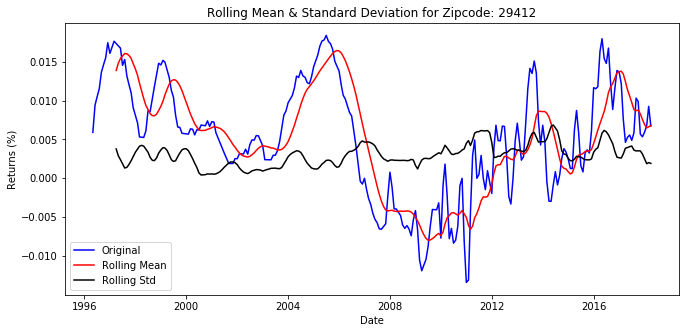

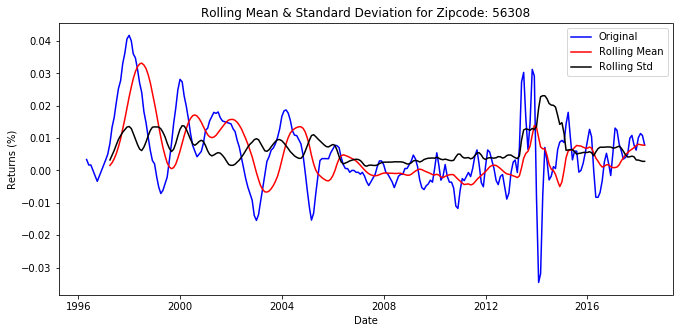

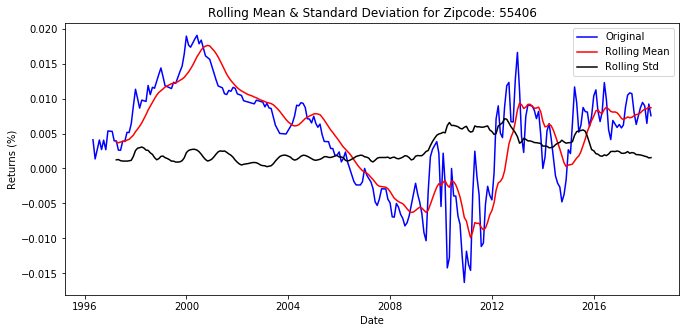

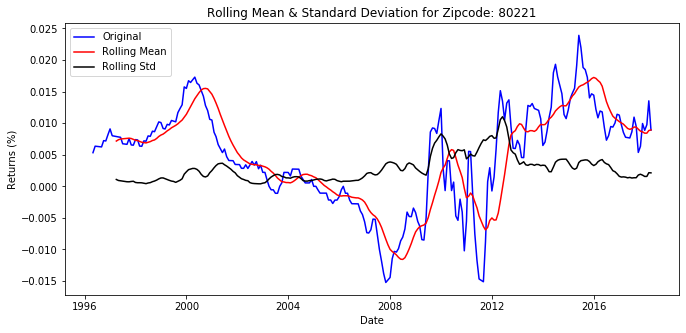

In [26]:
#Vizually test for stationarity with rolling mean and rolling standard deviation
for i in range(5):
    rolmean = dfs_ts[i].Return.rolling(window = 12, center = False).mean()
    rolstd = dfs_ts[i].Return.rolling(window = 12, center = False).std()
    fig = plt.figure(figsize=(11,5))
    orig = plt.plot(dfs_ts[i].Return, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend()
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {dfs_ts[i].RegionName[i]}')
    plt.show()

In [27]:
#perform dickey fuller to see if our data is stationary
for i in range(5):
    results = adfuller(dfs_ts[i].Return.dropna())
    print(f'ADFuller test p-value for zipcode: {dfs_ts[i].RegionName[i]}')
    print('p-value:',results[1])
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 29407
p-value: 0.12787550269306985
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 29412
p-value: 0.08063578652833103
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 56308
p-value: 0.029872060036786306
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 55406
p-value: 0.32741456447517925
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 80221
p-value: 0.36126276622751596
Fail to reject the null hypothesis. Data is not stationary.



In [28]:
for i in [0, 1, 3, 4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(dfs_ts[i].Return.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {dfs_ts[i].RegionName[i]}')
    print('p-value:',results[1])
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 29407
p-value: 1.0862012530812873e-07
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 29412
p-value: 7.289838231385235e-15
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 55406
p-value: 0.0002447313236647397
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 80221
p-value: 0.0002741061115500892
Reject the null hypothesis. Data is stationary.



## Modeling Each Zipcode

In [29]:
#List to help me remeber each zipcode and corresponding city name
#Charleston 29407
#Charleston 29412
#Alexandria 56308
#Minneapolis 55406
#Sherrelwood 80221
dfs_ts[0].drop(['RegionName'], axis=1, inplace=True)
dfs_ts[1].drop(['RegionName'], axis=1, inplace=True)
dfs_ts[2].drop(['RegionName'], axis=1, inplace=True)
dfs_ts[3].drop(['RegionName'], axis=1, inplace=True)
dfs_ts[4].drop(['RegionName'], axis=1, inplace=True)

dfs_ts[0].rename(columns={"Return": "y"}, inplace=True)
dfs_ts[1].rename(columns={"Return": "y"}, inplace=True)
dfs_ts[2].rename(columns={"Return": "y"}, inplace=True)
dfs_ts[3].rename(columns={"Return": "y"}, inplace=True)
dfs_ts[4].rename(columns={"Return": "y"}, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [30]:
ts_1 = dfs_ts[0].y.dropna()
ts_1d = dfs_ts[0].y.diff().dropna()

ts_2 = dfs_ts[1].y.dropna()
ts_2d = dfs_ts[1].y.diff().dropna()

ts_3 = dfs_ts[2].y.dropna()

ts_4 = dfs_ts[3].y.dropna()
ts_4d = dfs_ts[3].y.diff().dropna()

ts_5 = dfs_ts[3].y.dropna()
ts_5d = dfs_ts[3].y.diff().dropna()

In [31]:
ts_1

time
1996-05-01    0.003891
1996-06-01    0.006460
1996-07-01    0.006418
1996-08-01    0.007653
1996-09-01    0.008861
                ...   
2017-12-01    0.011431
2018-01-01    0.008562
2018-02-01    0.005772
2018-03-01    0.008778
2018-04-01    0.006024
Name: y, Length: 264, dtype: float64

### Charleston 29407

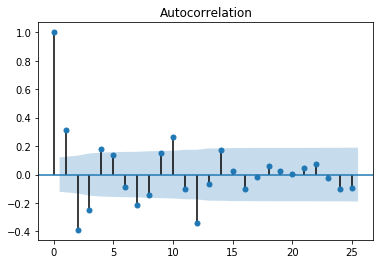

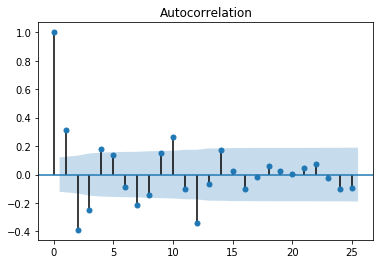

In [32]:
plot_acf(ts_1d[:-1], alpha=.05)

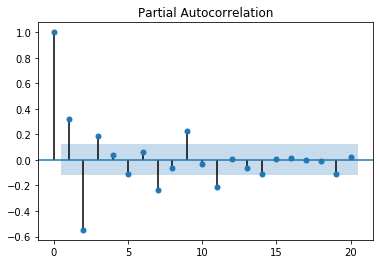

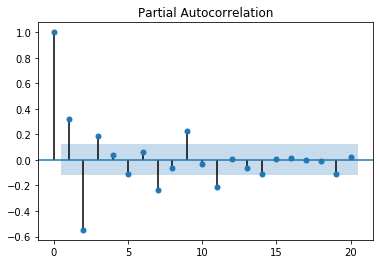

In [33]:
plot_pacf(ts_1d[:-1], alpha=.05, lags=20)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


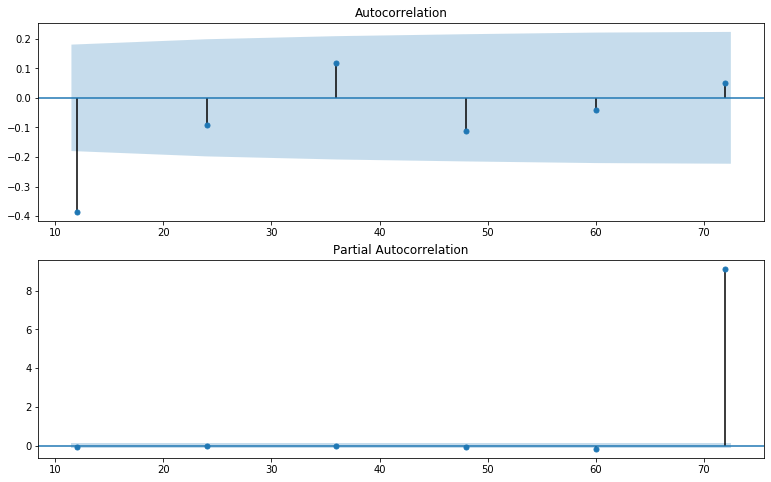

In [34]:
seasonal_plots(ts_1d[:-1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  227
Model:               SARIMAX(3, 0, 1)   Log Likelihood                1080.342
Date:                Wed, 17 Jun 2020   AIC                          -2150.685
Time:                        22:06:51   BIC                          -2133.560
Sample:                    06-01-1996   HQIC                         -2143.775
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1612      0.448      0.360      0.719      -0.717       1.040
ar.L2         -0.5315      0.184     -2.895      0.004      -0.891      -0.172
ar.L3         -0.0992      0.276     -0.360      0.7

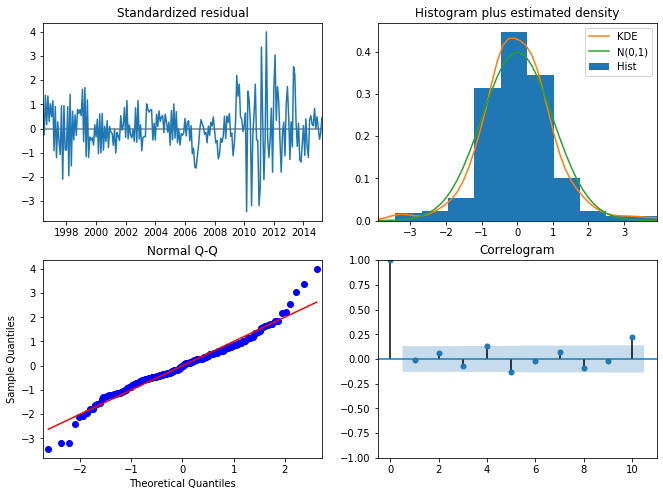

In [35]:
#Fit the SARIMA model and get results.
pdq = (3,0,1) #(AR, D, MA)
pdqs = (0,0,0,12)
train, test, results = model_fit(ts_1d, pdq=pdq, pdqs=pdqs)

SARIMA model RMSE on train data: 0.00201


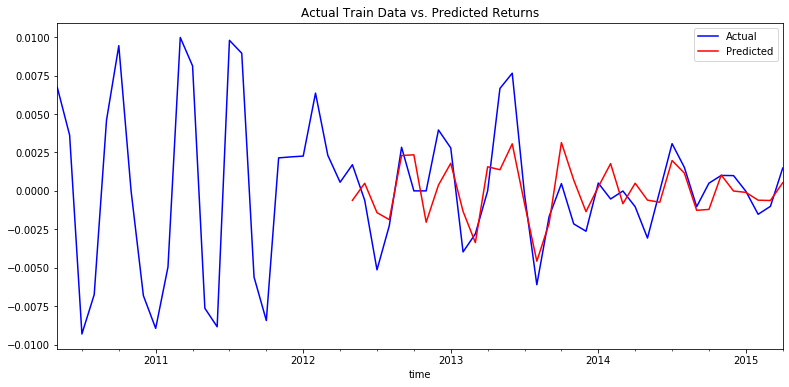

In [36]:
train_RMSE(train, results)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Max

SARIMA model RMSE on test data: 0.00322


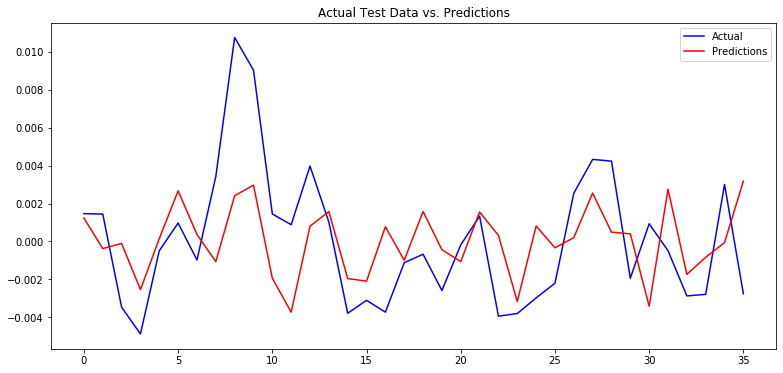

In [37]:
test_RMSE(ts_1d, pdq=pdq,pdqs=pdqs, display=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


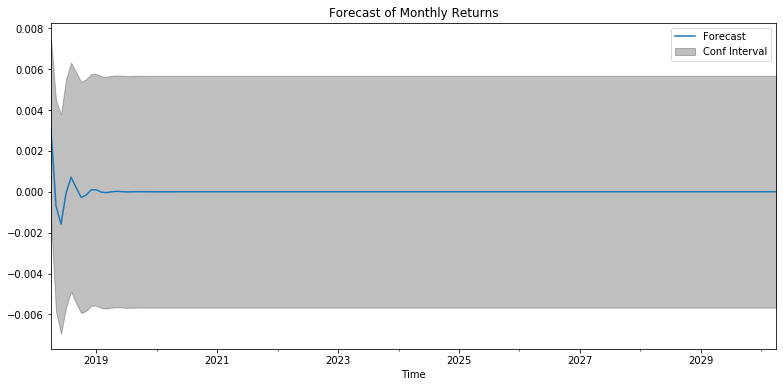

Total expected return in 1 year: 0.14%
Total expected return in 5 year: 0.14%
Total expected return in 10 years: 0.14%


In [38]:
Return_ts_1d = forecast_model(ts_1d, pdq=pdq, pdqs=pdqs, zc=29407)

### Charleston 29412

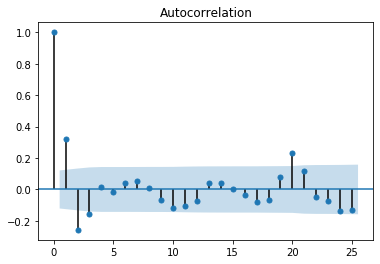

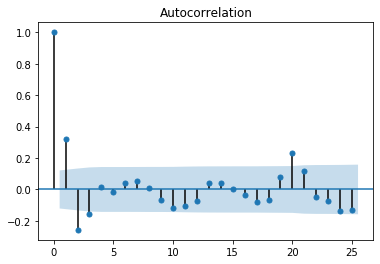

In [39]:
plot_acf(ts_2d[:-1], alpha=.05)

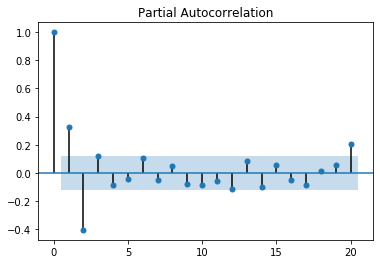

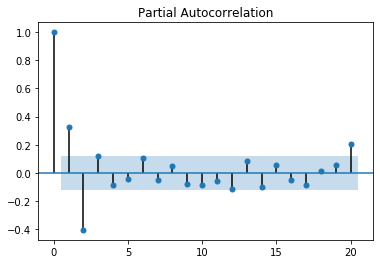

In [40]:
plot_pacf(ts_2d[:-1], alpha=.05, lags=20)

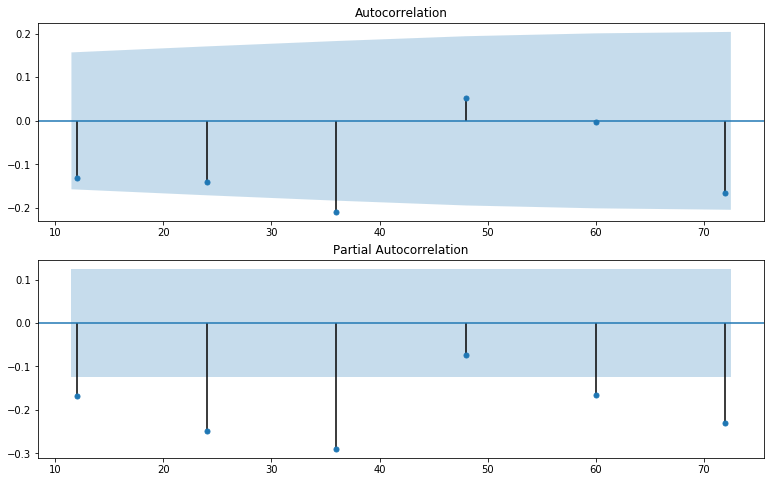

In [41]:
seasonal_plots(ts_2d[:-1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(5, 0, 1)   Log Likelihood                1111.796
Date:                Wed, 17 Jun 2020   AIC                          -2209.593
Time:                        22:06:57   BIC                          -2185.587
Sample:                    05-01-1996   HQIC                         -2199.907
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6721      0.395      1.702      0.089      -0.102       1.446
ar.L2          0.2325      0.489      0.475      0.635      -0.727       1.192
ar.L3         -0.1050      0.243     -0.433      0.6

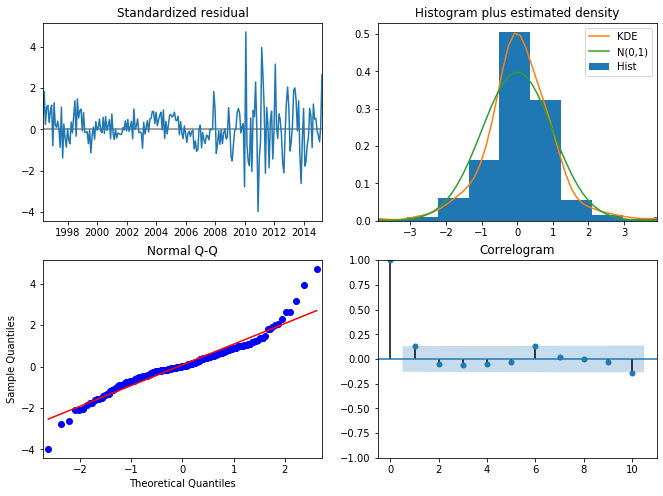

In [42]:
#Fit the SARIMA model and get results.
pdq = (5,0,1) #(AR, D, MA)
pdqs = (0,0,0,12)
train, test, results = model_fit(ts_2, pdq=pdq, pdqs=pdqs)

SARIMA model RMSE on train data: 0.00226


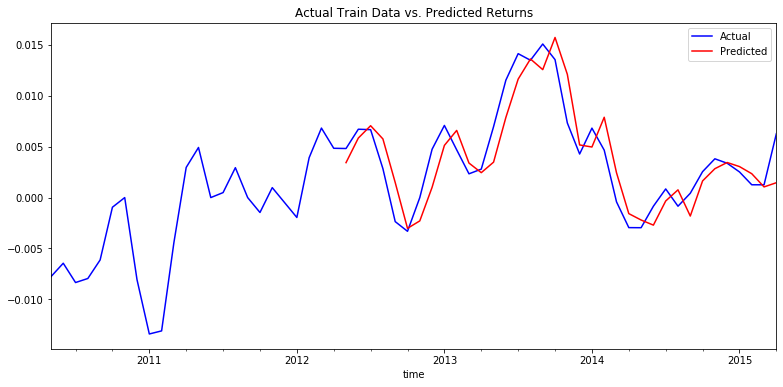

In [43]:
train_RMSE(train, results)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Max

SARIMA model RMSE on test data: 0.00213


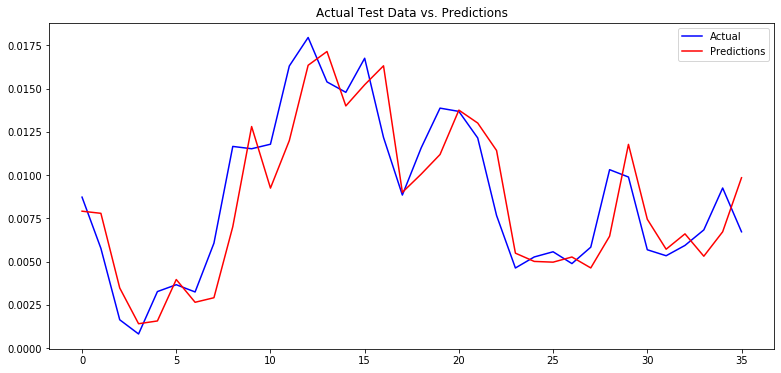

In [44]:
test_RMSE(ts_2, pdq=pdq,pdqs=pdqs, display=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


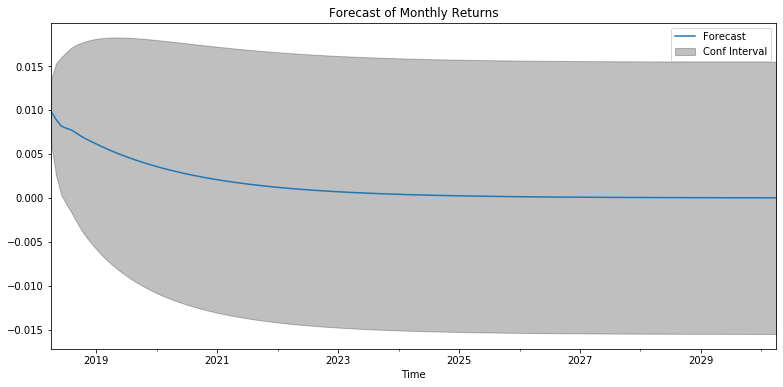

Total expected return in 1 year: 9.12%
Total expected return in 5 year: 21.44%
Total expected return in 10 years: 23.09%


In [45]:
Return_ts_2 = forecast_model(ts_2, pdq=pdq, pdqs=pdqs, zc=29412)

### Alexandria 56308 FB

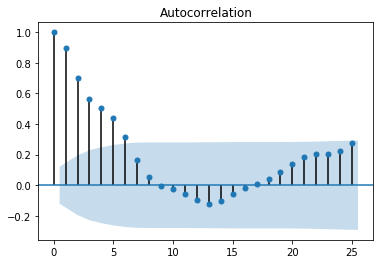

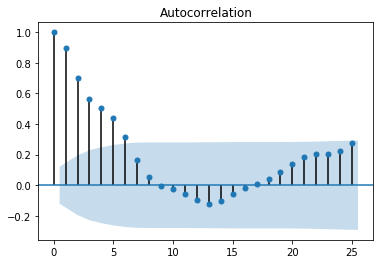

In [46]:
plot_acf(ts_3[:-1], alpha=.05)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


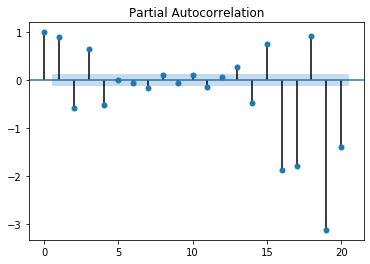

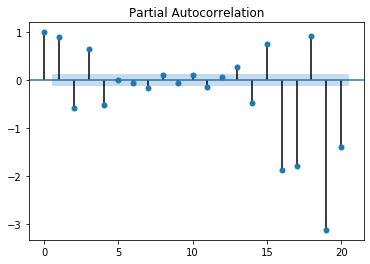

In [47]:
plot_pacf(ts_3[:-1], alpha=.05, lags=20)

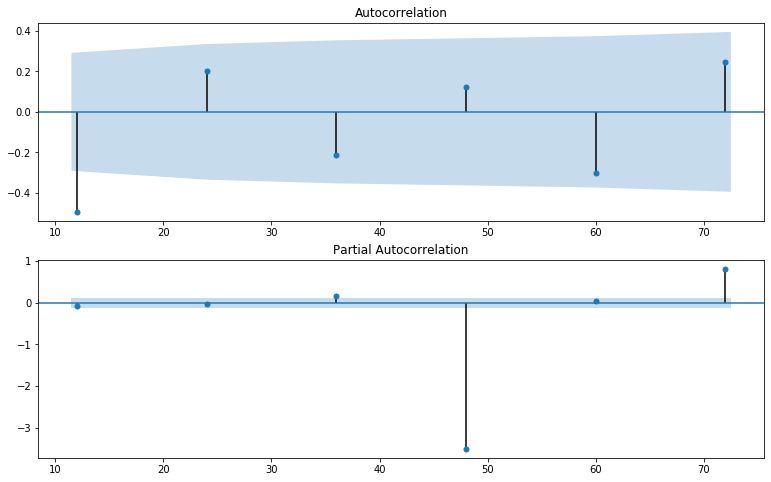

In [48]:
seasonal_plots(ts_3[:-1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 976.935
Date:                Wed, 17 Jun 2020   AIC                          -1945.871
Time:                        22:07:06   BIC                          -1932.171
Sample:                    05-01-1996   HQIC                         -1940.343
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5426      0.044     12.437      0.000       0.457       0.628
ar.L2         -0.5448      0.043    -12.708      0.000      -0.629      -0.461
ma.L1          0.4745      0.044     10.837      0.0

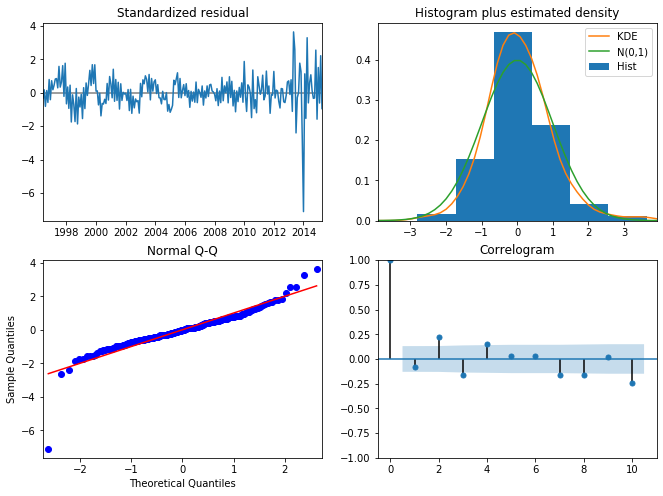

In [49]:
#Fit the SARIMA model and get results.
pdq = (2,1,1) #(AR, D, MA)
pdqs = (0,0,0,12)
train, test, results = model_fit(ts_3, pdq=pdq, pdqs=pdqs)

SARIMA model RMSE on train data: 0.00610


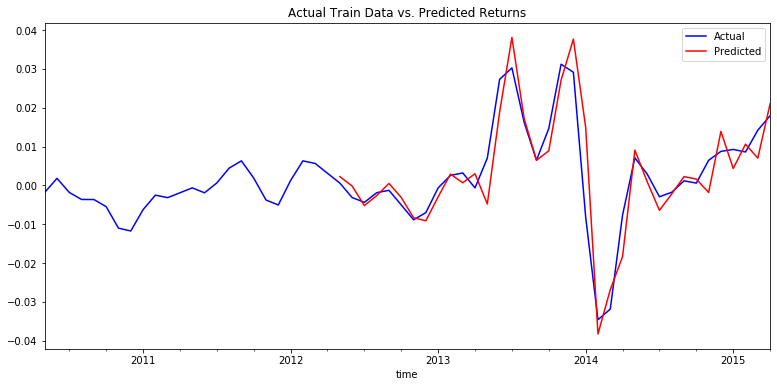

In [50]:
train_RMSE(train, results)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Max

SARIMA model RMSE on test data: 0.00318


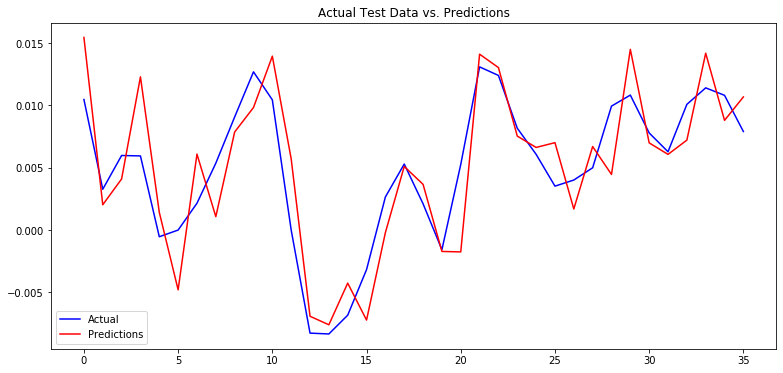

In [51]:
test_RMSE(ts_3, pdq=pdq,pdqs=pdqs, display=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


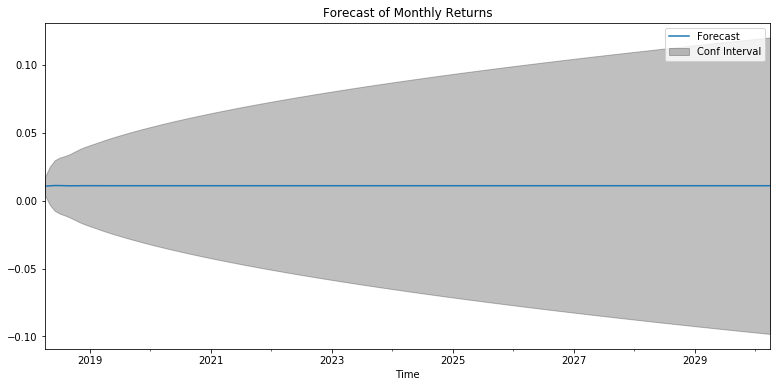

Total expected return in 1 year: 13.98%
Total expected return in 5 year: 92.52%
Total expected return in 10 years: 387.13%


In [52]:
Return_ts_3 = forecast_model(ts_3, pdq=pdq, pdqs=pdqs, zc=56308)

### Minneapolis 55406

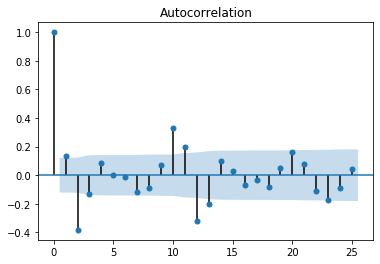

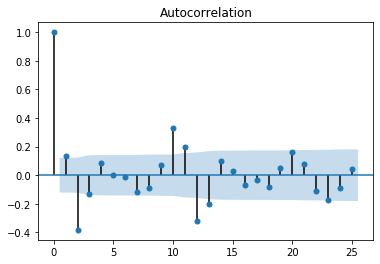

In [53]:
plot_acf(ts_4d[:-1], alpha=.05)

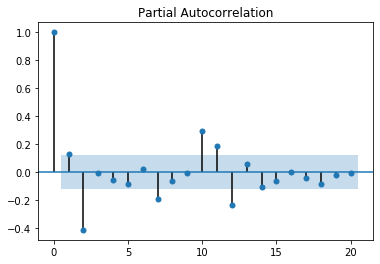

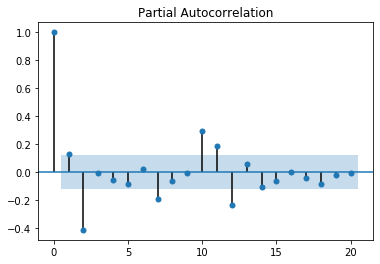

In [54]:
plot_pacf(ts_4d[:-1], alpha=.05, lags=20)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


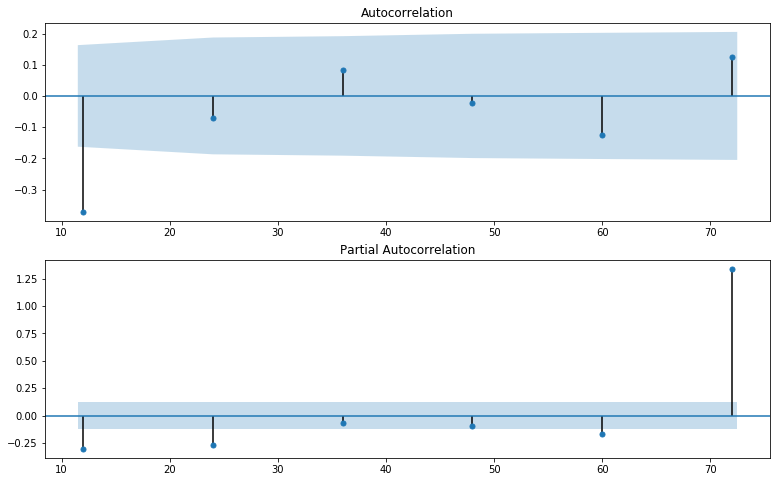

In [55]:
seasonal_plots(ts_4d[:-1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(4, 0, 1)   Log Likelihood                1047.588
Date:                Wed, 17 Jun 2020   AIC                          -2083.175
Time:                        22:07:12   BIC                          -2062.599
Sample:                    05-01-1996   HQIC                         -2074.873
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6040      0.125      4.817      0.000       0.358       0.850
ar.L2          0.0615      0.126      0.490      0.624      -0.185       0.308
ar.L3          0.3075      0.084      3.663      0.0

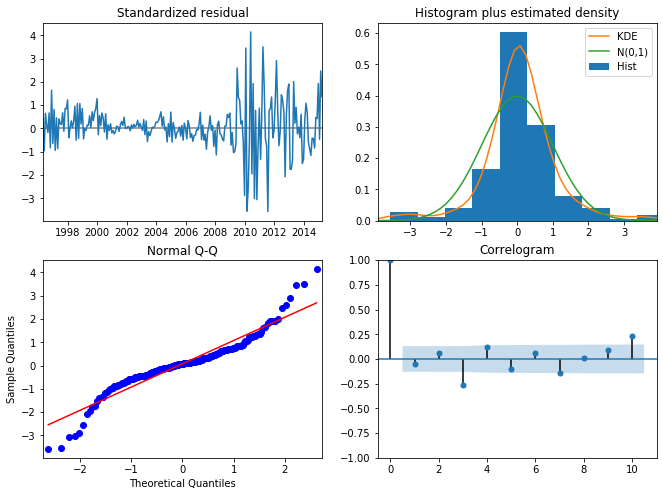

In [56]:
#Fit the SARIMA model and get results.
pdq = (4,0,1) #(AR, D, MA)
pdqs = (0,0,0,12)
train, test, results = model_fit(ts_4, pdq=pdq, pdqs=pdqs)

SARIMA model RMSE on train data: 0.00288


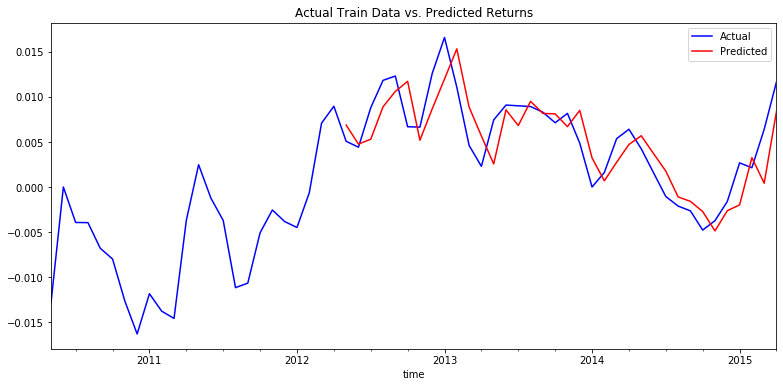

In [57]:
train_RMSE(train, results)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Max

SARIMA model RMSE on test data: 0.00185


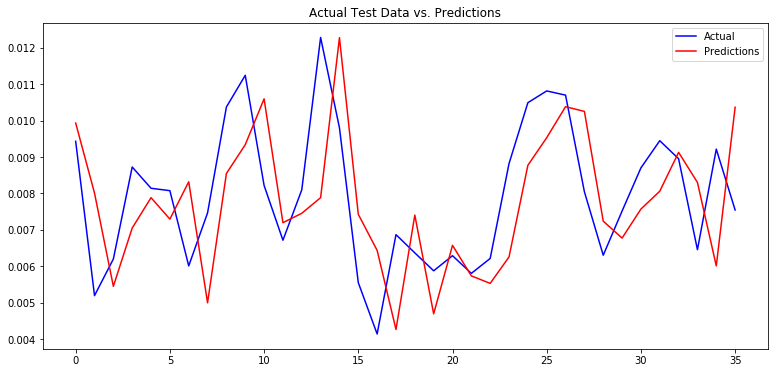

In [58]:
test_RMSE(ts_4, pdq=pdq,pdqs=pdqs, display=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


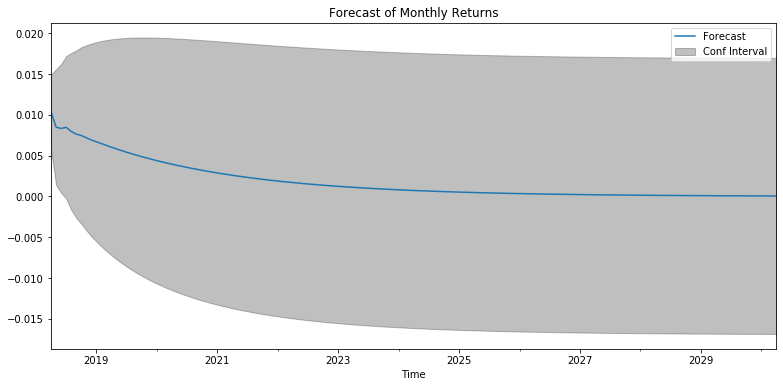

Total expected return in 1 year: 9.62%
Total expected return in 5 year: 26.33%
Total expected return in 10 years: 30.26%


In [59]:
Return_ts_4 = forecast_model(ts_4, pdq=pdq, pdqs=pdqs, zc=55406)

### Sherrelwood 80221

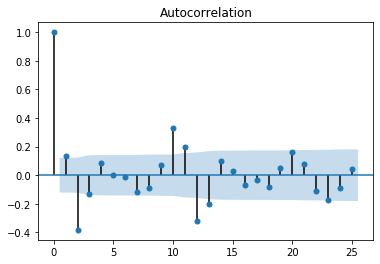

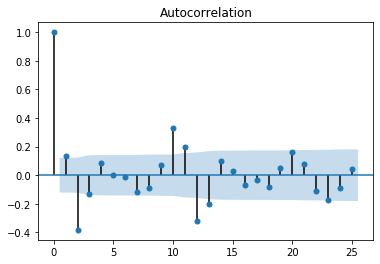

In [60]:
plot_acf(ts_5d[:-1], alpha=.05)

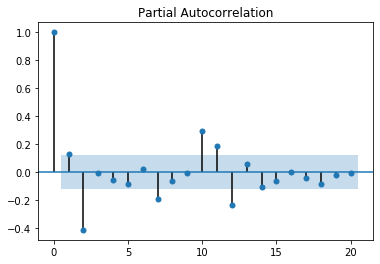

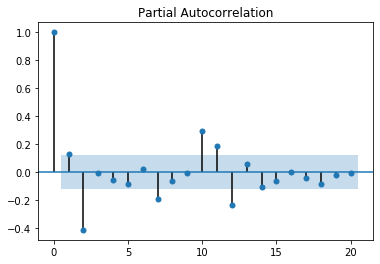

In [61]:
plot_pacf(ts_5d[:-1], alpha=.05, lags=20)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


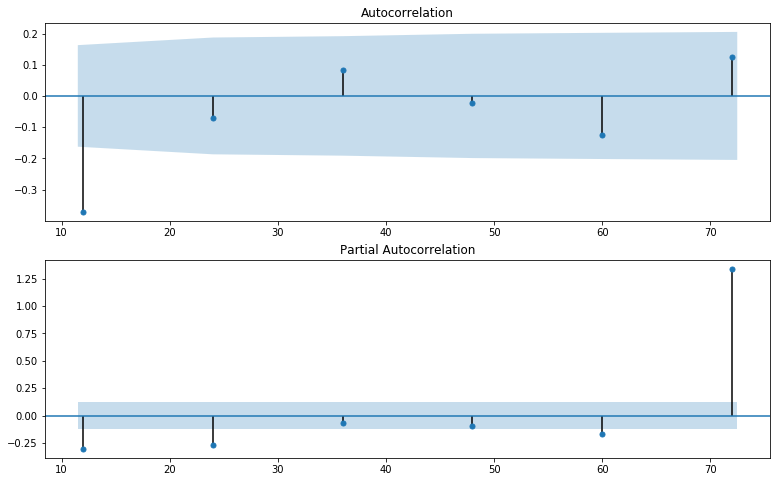

In [62]:
seasonal_plots(ts_5d[:-1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(4, 0, 1)   Log Likelihood                1047.588
Date:                Wed, 17 Jun 2020   AIC                          -2083.175
Time:                        22:07:21   BIC                          -2062.599
Sample:                    05-01-1996   HQIC                         -2074.873
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6040      0.125      4.817      0.000       0.358       0.850
ar.L2          0.0615      0.126      0.490      0.624      -0.185       0.308
ar.L3          0.3075      0.084      3.663      0.0

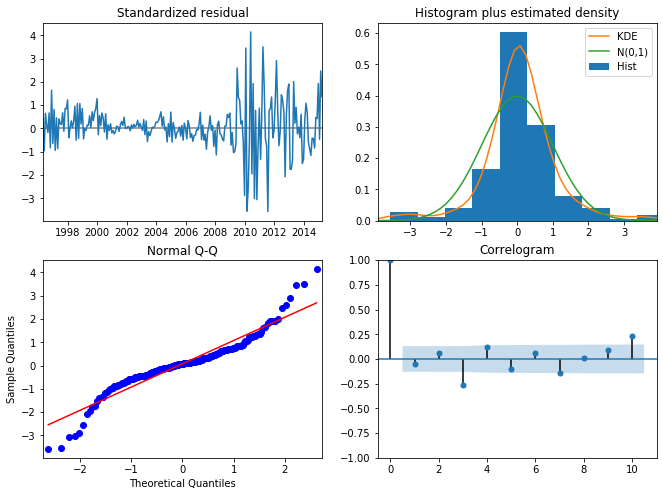

In [63]:
#Fit the SARIMA model and get results.
pdq = (4,0,1) #(AR, D, MA)
pdqs = (0,0,0,12)
train, test, results = model_fit(ts_4, pdq=pdq, pdqs=pdqs)

SARIMA model RMSE on train data: 0.00288


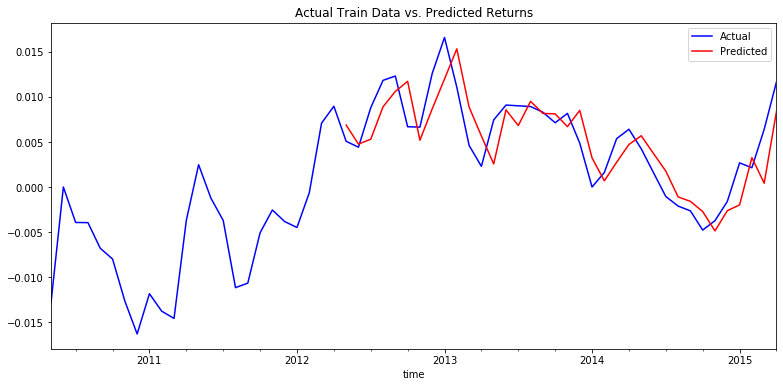

In [64]:
train_RMSE(train, results)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Max

SARIMA model RMSE on test data: 0.00185


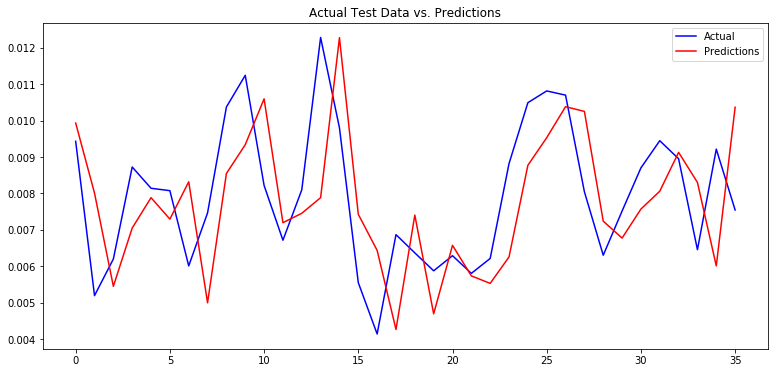

In [65]:
test_RMSE(ts_5, pdq=pdq,pdqs=pdqs, display=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


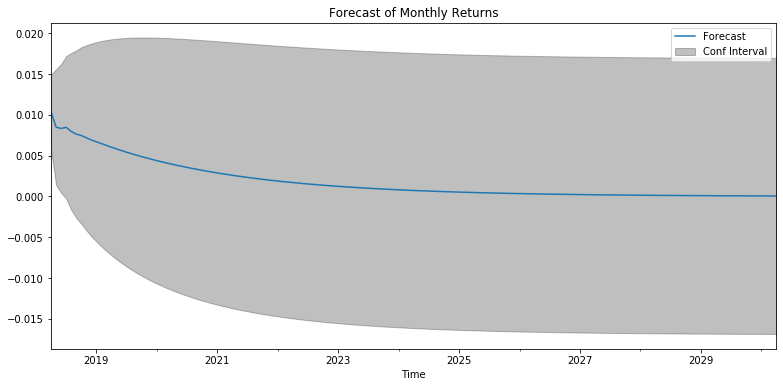

Total expected return in 1 year: 9.62%
Total expected return in 5 year: 26.33%
Total expected return in 10 years: 30.26%


In [66]:
Return_ts_5 = forecast_model(ts_5, pdq=pdq, pdqs=pdqs, zc=80221)

## Facebook Profit Model

In [79]:
# import Face bookProphet
from fbprophet import Prophet
#Changing the data to run for Facebook Prophet
dfs_ts[0].reset_index(level=0, inplace=True)
dfs_ts[1].reset_index(level=0, inplace=True)
dfs_ts[2].reset_index(level=0, inplace=True)
dfs_ts[3].reset_index(level=0, inplace=True)
dfs_ts[4].reset_index(level=0, inplace=True)

dfs_ts[0].drop(['value'], axis=1, inplace=True)
dfs_ts[1].drop(['value'], axis=1, inplace=True)
dfs_ts[2].drop(['value'], axis=1, inplace=True)
dfs_ts[3].drop(['value'], axis=1, inplace=True)
dfs_ts[4].drop(['value'], axis=1, inplace=True)

dfs_ts[0].rename(columns={"time": "ds"}, inplace=True)
dfs_ts[1].rename(columns={"time": "ds"}, inplace=True)
dfs_ts[2].rename(columns={"time": "ds"}, inplace=True)
dfs_ts[3].rename(columns={"time": "ds"}, inplace=True)
dfs_ts[4].rename(columns={"time":"ds"}, inplace=True)


KeyError: "['value'] not found in axis"

## Charleston 29407 FB

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



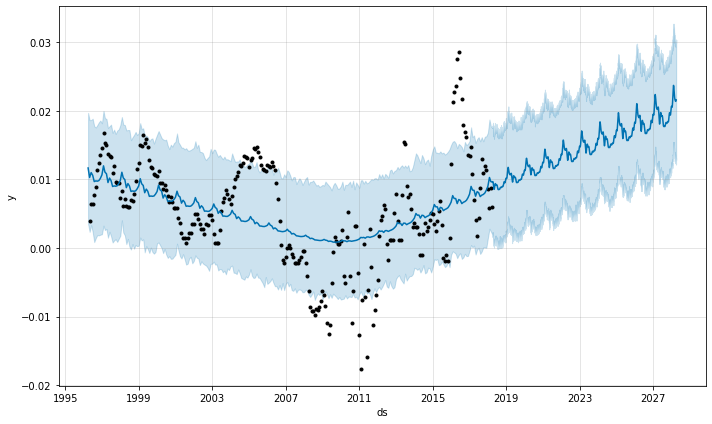

In [68]:
prophet = Prophet(seasonality_mode = 'multiplicative').fit(dfs_ts[0])

future = prophet.make_future_dataframe(periods=3652)
fcst = prophet.predict(future)
fig = prophet.plot(fcst)

In [69]:
forecast1 = prophet.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3912 2028-03-27  0.021448    0.013104    0.029621
3913 2028-03-28  0.021477    0.013139    0.029788
3914 2028-03-29  0.021509    0.012963    0.029978
3915 2028-03-30  0.021543    0.011958    0.030160
3916 2028-03-31  0.021579    0.013618    0.029523

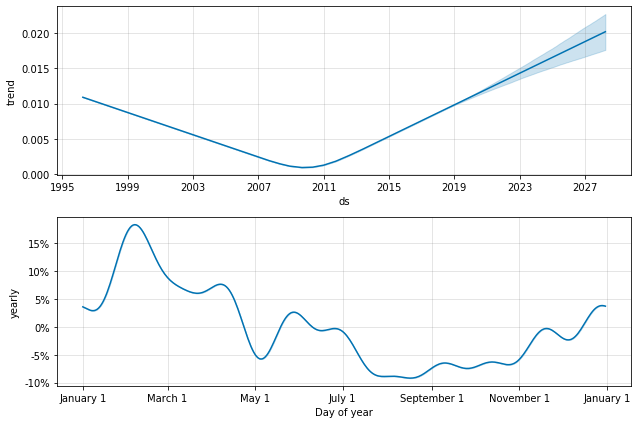

In [72]:
fig2 = prophet.plot_components(forecast1)

## Charleston 29412 FB

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


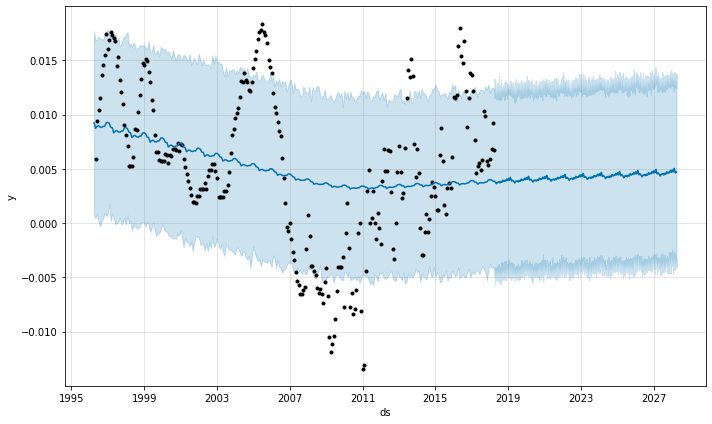

In [74]:
from fbprophet import Prophet
prophet = Prophet(seasonality_mode = 'multiplicative').fit(dfs_ts[1])

future = prophet.make_future_dataframe(periods=3652)
fcst = prophet.predict(future)
fig = prophet.plot(fcst)

In [75]:
forecast2 = prophet.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3912 2028-03-27  0.004729   -0.003398    0.013603
3913 2028-03-28  0.004727   -0.003724    0.013135
3914 2028-03-29  0.004725   -0.003581    0.013256
3915 2028-03-30  0.004722   -0.003969    0.013623
3916 2028-03-31  0.004717   -0.004122    0.013427

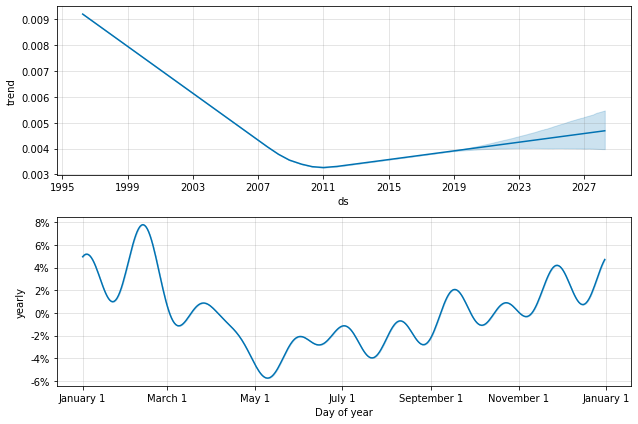

In [77]:
fig2 = prophet.plot_components(forecast2)

## Alexandria 56308 FB

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


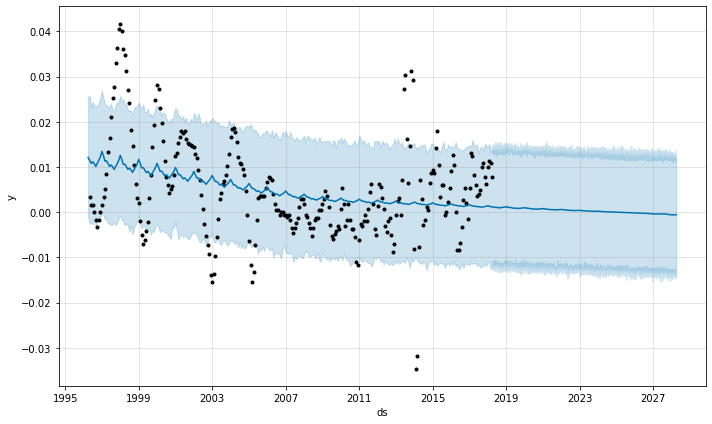

In [80]:
prophet = Prophet(seasonality_mode = 'multiplicative').fit(dfs_ts[2])

future = prophet.make_future_dataframe(periods=3652)
fcst = prophet.predict(future)
fig = prophet.plot(fcst)

In [81]:
forecast3 = prophet.predict(future)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3912 2028-03-27 -0.000577   -0.014137    0.012182
3913 2028-03-28 -0.000575   -0.013791    0.013030
3914 2028-03-29 -0.000574   -0.013636    0.014010
3915 2028-03-30 -0.000572   -0.014214    0.013928
3916 2028-03-31 -0.000571   -0.012989    0.011699

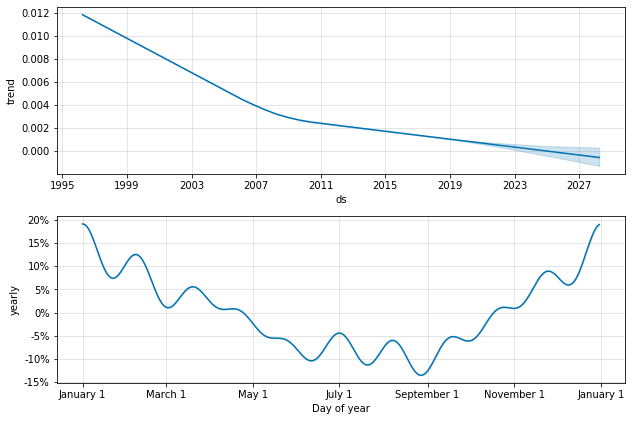

In [82]:
fig2 = prophet.plot_components(forecast3)

## Minneapolis 55406 FB

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


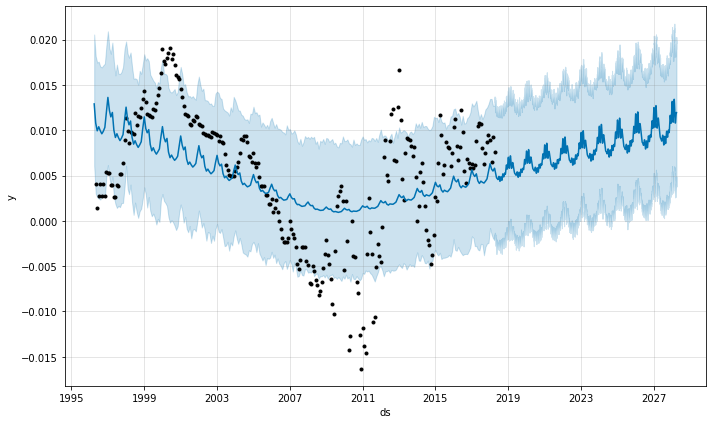

In [83]:
prophet = Prophet(seasonality_mode = 'multiplicative').fit(dfs_ts[3])

future = prophet.make_future_dataframe(periods=3652)
fcst = prophet.predict(future)
fig = prophet.plot(fcst)

In [84]:
forecast4 = prophet.predict(future)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3912 2028-03-27  0.011951    0.003896    0.019445
3913 2028-03-28  0.011965    0.004260    0.019817
3914 2028-03-29  0.011969    0.003761    0.019848
3915 2028-03-30  0.011963    0.004237    0.019136
3916 2028-03-31  0.011947    0.004421    0.019544

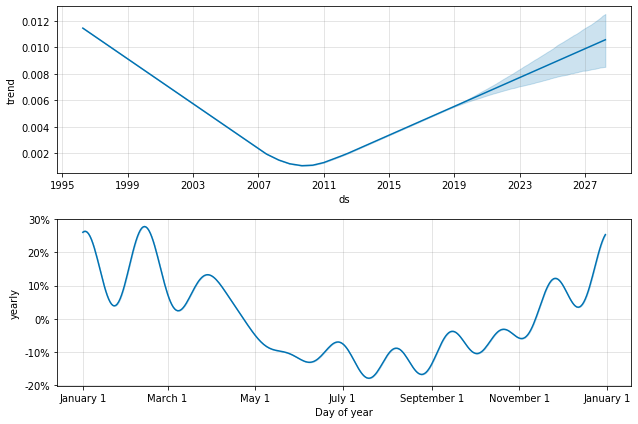

In [85]:
fig2 = prophet.plot_components(forecast4)

## Sherrelwood 80221 FB

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


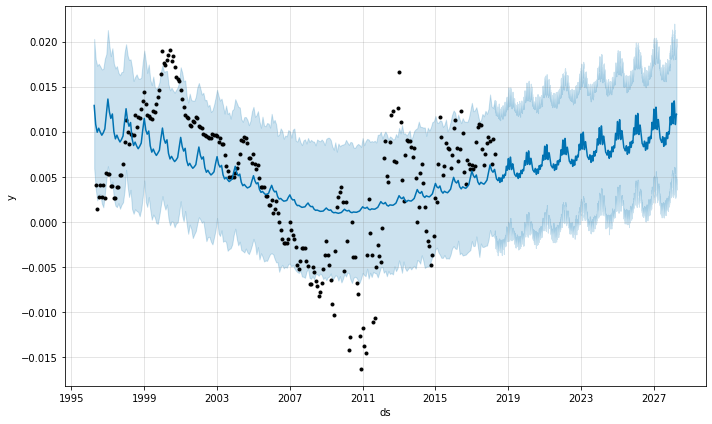

In [87]:
prophet = Prophet(seasonality_mode = 'multiplicative').fit(dfs_ts[3])

future = prophet.make_future_dataframe(periods=3652)
fcst = prophet.predict(future)
fig = prophet.plot(fcst)

In [88]:
forecast5 = prophet.predict(future)
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3912 2028-03-27  0.011951    0.003353    0.019698
3913 2028-03-28  0.011965    0.003707    0.019632
3914 2028-03-29  0.011969    0.004550    0.020006
3915 2028-03-30  0.011963    0.004417    0.020216
3916 2028-03-31  0.011947    0.004642    0.020162

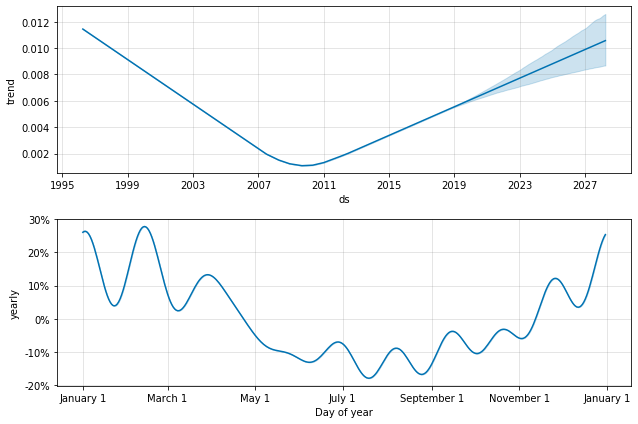

In [90]:
fig2 = prophet.plot_components(forecast5)